# Background
---


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors <b> describe the challenges users face when trying to make judgements about probabilistic data generated through samples </b>. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is <b> difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal) </b>. One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>


# Data Processing and Cleaning

In [8]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from matplotlib.cm import ScalarMappable

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# creating array of year values for later querying
years = df.index.values

# creating mean columns for each year
for i in df.index.values:
    df.at[i,'mean'] = df.loc[i].mean()
    
# creating std. error (std. dev. of means) columns for each year
for i in df.index.values:
    df.at[i,'se_mean'] = df.loc[i].std()/math.sqrt(df.loc[i]['mean'])

# confidence intervals reflect 95% confidence intervals for means
for i in df.index.values:
    df.at[i,'CI95'] = (1.96 * (df.loc[i].std()/(math.sqrt(len(df.loc[i])-2)))) 

# Create Interactive Bar Chart

<IPython.core.display.Javascript object>


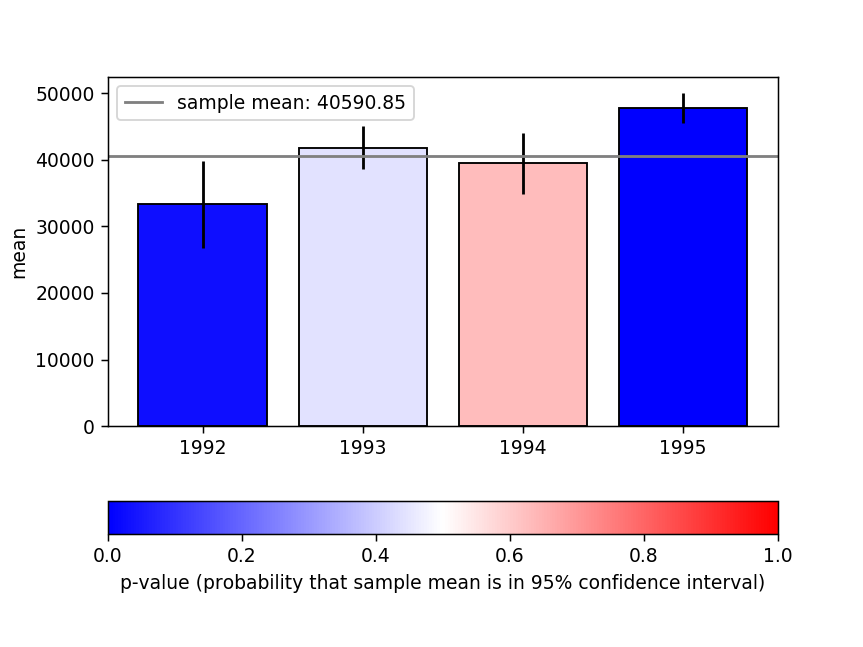

7

In [10]:
# create interactive plot

plt.figure()

def interactive_errorplot():    
    plt.bar(years, df['mean'], yerr = df['CI95'], edgecolor = 'black', color = 'grey')
    plt.xticks(years)
   
    plt.show()

def errorplot_easy(ynum: float):
    pvals = [stats.ttest_1samp(a=df.loc[i], popmean=ynum).pvalue for i in years]
    
    plt.clf()
    plt.axhline(ynum, color='grey', label='sample mean: {:.2f}'.format(ynum))
    
    my_cmap = plt.cm.get_cmap('bwr')
    colors = my_cmap(pvals)
    
    plt.bar(years, df['mean'], yerr = df['CI95'], edgecolor = 'black', color = colors)
    
    sm = ScalarMappable(cmap = my_cmap)
    sm.set_array([])

    plt.colorbar(sm, orientation="horizontal", label='p-value (probability that sample mean is in 95% confidence interval)')
    plt.xticks(years)
    plt.ylabel('mean')
    
    plt.legend()

def onclick(event):
    plt.cla()
    errorplot_easy(event.ydata)

interactive_errorplot()
plt.gcf().canvas.mpl_connect('button_press_event', onclick)